In [271]:
# 1.importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import statistics
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [224]:
# 2.reading the data and assigning it into a dataframe named df
df= pd.read_csv("insurance.csv")

#Performing basic EDA

In [227]:
#3a
print(df.head())# to display the first 5 observations

print("The dimension of the dataframe is",df.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
The dimension of the dataframe is (1338, 7)


The dataframe has 7 attributes and 1338 observations

In [228]:
#3b.
df.info()# this helps to understand the datatype of each attribute, number of non-null entries , index range etc


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


1. The dataframe has 7 columns out of which 4 are numerical and 3 are objects(String).
2. It has no columns which are null.
3. The index ranges from 0 to 1337

In [236]:
#3c.Checking the presence of missing values
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df1 = pd.read_csv("insurance.csv", na_values = missing_values)


In [238]:
# Detecting numbers in object columns
a=['region','sex','smoker']
for i in a:
    cnt=0
    for row in df1[i]:
        try:
            int(row)
            df.loc[cnt, i]=np.nan
        except ValueError:
            pass
        cnt+=1

In [240]:

#print (df.isnull().values.any())# Any missing values?
#print(df.isnull().sum().sum())# Total number of missing values
df1.isnull().sum()# Total missing values for each feature

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [241]:
df=df1

In [274]:
#3d
df.describe(include='all')# to get the 5 number summary

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


1. Average age of the population is roughly 39
2. Most(75%) people have 2 children or less
3. Population has most of the people from southeast region(364)
4. Majority of the population are non-smokers(1064)



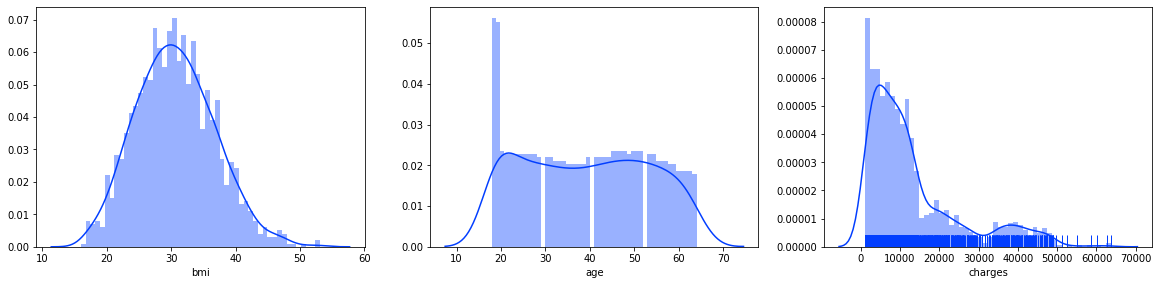

In [244]:
#3e, Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
#sns.set_style('dark')
sns.set_palette("bright")
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(df['bmi'],bins=50)
plt.subplot(3,3,2)
sns.set_palette("bright")
sns.distplot(df['age'],bins=50)
plt.subplot(3,3,3)
sns.distplot(df['charges'],bins=50,rug=True)


1. Charges are highly skewed to the right.
2. BMI almost has a normal standard distribution.
3. Except for a few points, age column is almost uniformly distributed.

In [77]:
#3f,Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
#For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, 
#and positive skew indicates that the tail is on the right
df[['age','bmi','charges']].skew(axis = 0, skipna = True) 

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

Charges is the most skewed  and age is the least skewed among the three.

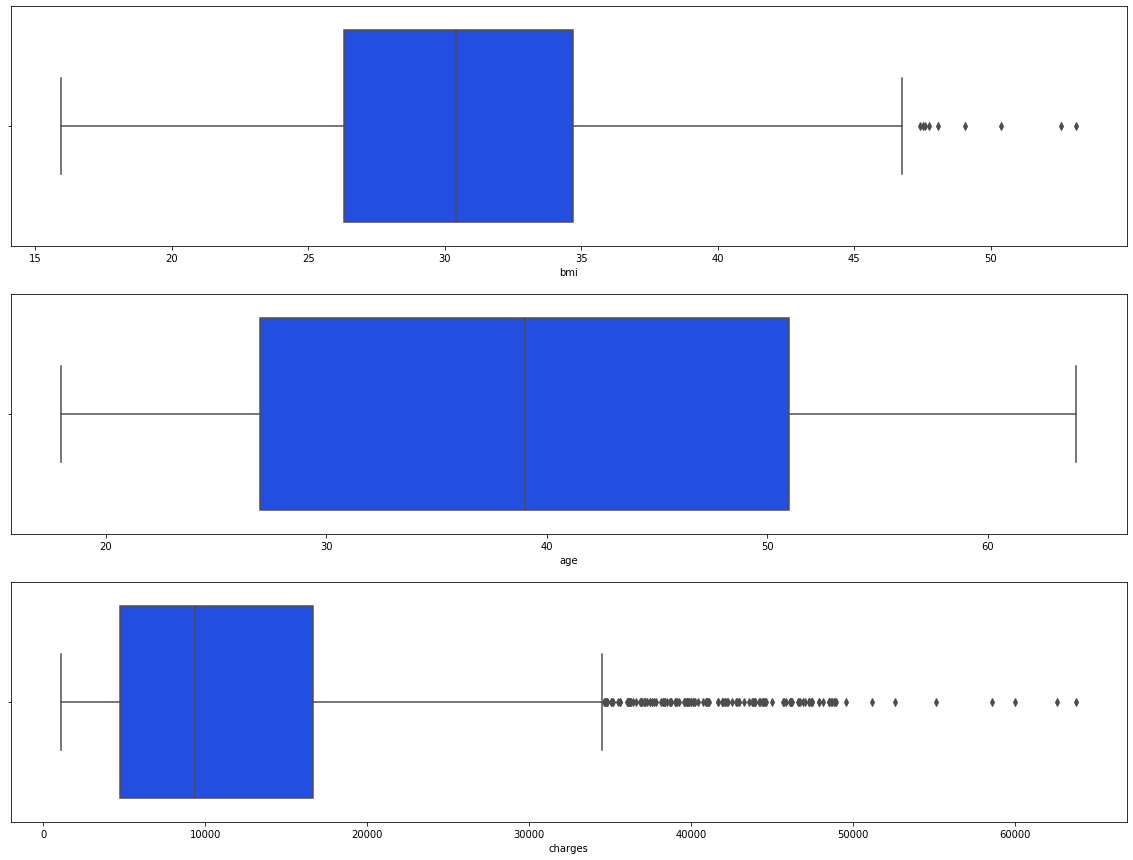

In [247]:
#3g,Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(df['bmi'])
plt.subplot(3,1,2)
sns.boxplot(df['age'])
plt.subplot(3,1,3)
sns.boxplot(df['charges'])

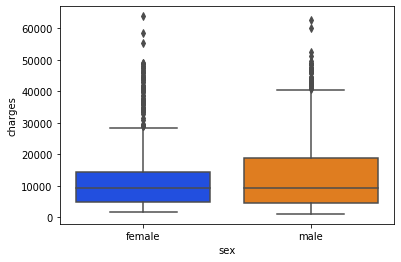

In [22]:
sns.boxplot(y=df['charges'],x=df['sex'])

1. Charges have the most number of outliers. It is obvious from the boxplot of charges with hue="sex", 
that the maximum number of outliers are in female gender.
2. BMI also has a few outliers

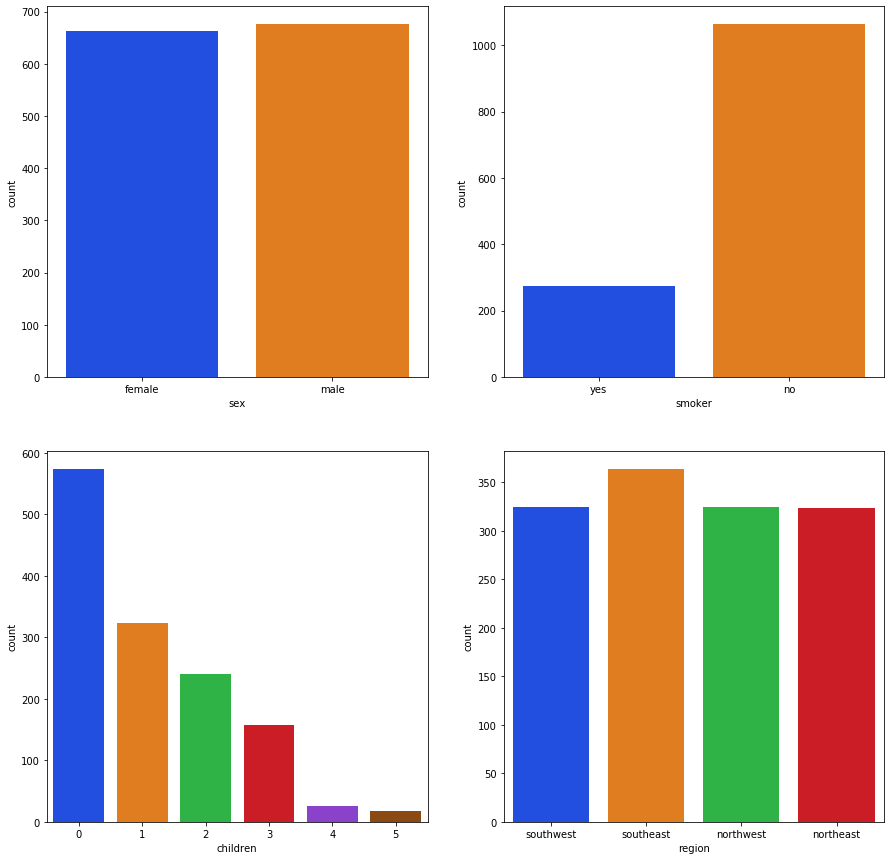

In [258]:
#3h,Distribution of categorical columns
plt.figure(figsize= (15,15))
plt.subplot(2,2,1)
sns.countplot(x="sex" ,data=df)
plt.subplot(2,2,2)
sns.countplot(x="smoker" ,data=df)
plt.subplot(2,2,3)
sns.countplot(x="children" ,data=df)
plt.subplot(2,2,4)
sns.countplot(x="region" ,data=df)


1. The sex ratio in the given dataset is almost 1:1
2. The no. of smokers in the population is less compared to the non-smokers
3. The number of people with more than 2 kids is less in the population
4. Population is uniformly distributed across the four regions

In [272]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = df.copy()
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

/Users/lek/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lek/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


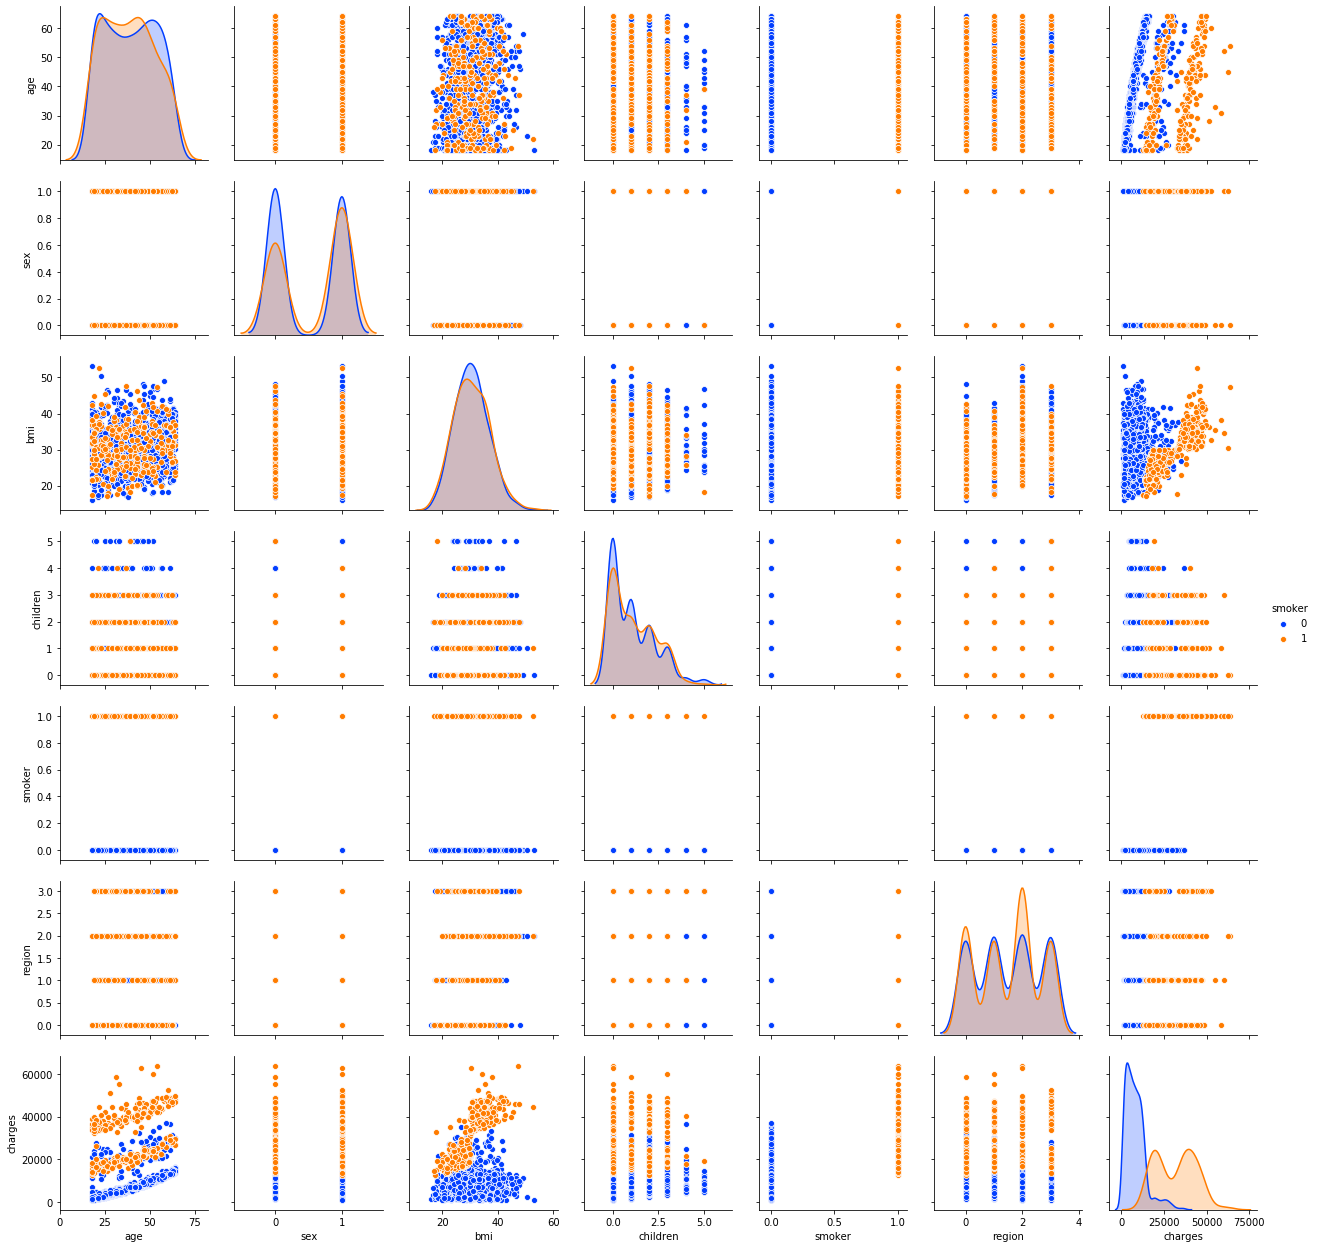

In [273]:
#3i,Pair plot that includes all the columns of the data frame
sns.pairplot(df_encoded,hue='smoker')

1. There is a slight positive corelation between charges and age and and strong relationship in case of charges and smoker
2. The plot says that the smokers claimed more charges than non-smokers

#Hypothesis Testing

#Question 4a:Do charges of people who smoke differ significantly from the people who don't?

H0:charges of smoker <=charges of non-smoker


Ha:charges of smoker>charges of non-smoker

alpha=0.05: right tailed



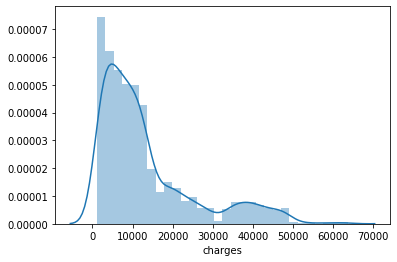

In [204]:
#checking whether charges follows standard normal distribution
sns.distplot(df['charges'])

Charges donot follow a standard normal distribution and the data is right-skewed.

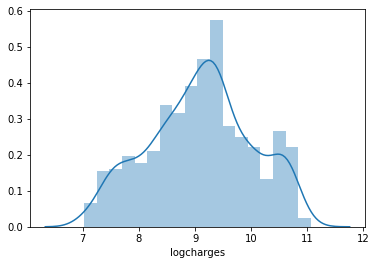

In [206]:
#Applying log transformation to make the data normal.
df['logcharges']=np.log(df['charges'])
sns.distplot(df['logcharges'])#checking the distribution after log transformation

In [208]:
# check for homogenity of variance
stats.levene(smoker_charges,nonsmoker_charges)

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

since pval <0.05, the variance of data is not homogenous

In [212]:
smoker_charges=df[df['smoker']=='yes'].logcharges#charges of smoker
nonsmoker_charges=df[df['smoker']=='no'].logcharges#charges of non-smoker
print(f'The mean of the charges for smoker is {smoker_charges.mean()} and that for non-smoker is {nonsmoker_charges.mean()}')



The mean of the charges for smoker is 10.304109568020348 and that for non-smoker is 8.788232479636047


In [217]:
#Applying 2 sample t-test to check the hypothesis
t_stats,p_charges=stats.ttest_ind(smoker_charges,nonsmoker_charges,equal_var=False)

p_charges=p_charges_2_sided/2# as the test is two-tailed

In [218]:
if p_charges < 0.05:
    print(f'With a p-value of {p_charges} the difference is significant. So we reject the null hypothesis')
else:
    print(f'With a p-value of {p_charges} the difference is not significant. So we fail to reject the null hypothesis')

With a p-value of 3.153823178588982e-172 the difference is significant. So we reject the null hypothesis


Charges of smokers and non-smokers are  different
 

#Question 4b:Does bmi of males differ significantly from that of females?

H0:mean of males_bmi=mean of females_bmi

Ha:mean of males_bmi!=mean of females_bmi

alpha=0.05: two tailed hypothesis






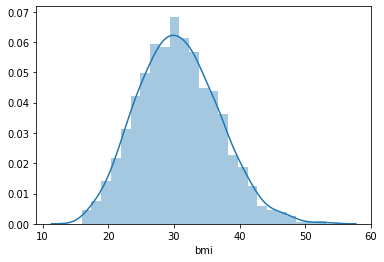

In [189]:
#checking whether bmi follows standard normal distribution
sns.distplot(df['bmi'])

BMI follows a standard normal distribution.

In [ ]:


#stats.levene(male_bmi,female_bmi)#to check homogenity of variance. IF pvalue>0.05 can be equal_var=True

In [190]:
male_bmi=df[df['sex']=='male'].bmi #bmi of males
female_bmi=df[df['sex']=='female'].bmi #bmi of females

print(f'The BMI of male is {male_bmi.mean()} and that of female is {female_bmi.mean()}')
print("we have to check whether there is a significant change in the bmis of male and female")


The BMI of male is 30.943128698224832 and that of female is 30.377749244713023
we have to check whether there is a significant change in the bmis of male and female


In [191]:
# Applying 2 sample t-test to check if there is any significant change in the BMI s of male and female 
t_stat_bmi,p_bmi=stats.ttest_ind(male_bmi,female_bmi)
print(t_stat_bmi,p_bmi)

1.696752635752224 0.08997637178984932


In [192]:
if p_bmi < 0.05:
    print(f'With a p-value of {p_bmi} the difference is significant. So we reject the null hypothesis')
else:
    print(f'With a p-value of {p_bmi} the difference is not significant. So we fail to reject the null hypothesis')

With a p-value of 0.08997637178984932 the difference is not significant. So we fail to reject the null hypothesis


There is no significant change in the BMI s of male and female.
 

#Question 4c: Is the proportion of smokers significantly different in different genders?

H0:No change in proportion of smokers in different genders . 
ie.,prop of smoker_females=prop of smoker_males
Ha:There is a change in proportion of smokers in different genders.
ie.,prop of smoker_females!=prop of smoker_males

alpha = 0.05 : two-tailed hypothesis



In [193]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = df.sex.value_counts()[1] # number of females in the data
n_males = df.sex.value_counts()[0] #number of males in the data

In [194]:
crosstab = pd.crosstab(df['sex'],df['smoker'])
print(crosstab)
female_prop=female_smokers/n_females
male_prop=male_smokers/n_males
print(f'Proportion of smokers in FEMALE gender is {female_prop} and proportion of smokers in MALE gender is {male_prop}')


smoker   no  yes
sex             
female  547  115
male    517  159
Proportion of smokers in FEMALE gender is 0.17371601208459214 and proportion of smokers in MALE gender is 0.23520710059171598


In [195]:
# Applying test of proportion to check if there is a significant difference in proportion of smokers in different genders
stat, p = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
#print(p)

if p< 0.05:
    print(f'With a p-value of {(p)} the difference is significant.So we reject the null hypothesis')
else:
    print(f'With a p-value of {(p)} the difference is not significant.So we fail to reject the null hypothesis')

With a p-value of 0.005324114164320532 the difference is significant.So we reject the null hypothesis


There is a change in proportion of smokers in different genders. 
The Proportion of smokers in males and that of the smokers in females are significantly different

#Question 4d:Is the distribution of bmi across women with no children, one child and two children the same?

H0:No.of children has no effect on BMI of females.
ie.,mean of BMI_females_0_kid=mean of BMI_females_1_kid=mean of BMI_females_2_kid

Ha:No.of children has an effect on BMI of females.
ie.,mean of BMI_females_0_kid!=mean of BMI_females_1_kid!=mean of BMI_females_2_kid

alpha = 0.05 two-tailed hypothesis


In [196]:
female_0_kid=df[(df['children']==0) & (df['sex']=='female')].bmi#BMI of females with no children
female_1_kid=df[(df['children']==1) & (df['sex']=='female')].bmi#BMI of females with 1 child
female_2_kid=df[(df['children']==2) & (df['sex']=='female')].bmi#BMI of females with 2 children

In [197]:
# applying one way ANOVA to test the hypothesis
t,p=stats.f_oneway(female_0_kid,female_1_kid,female_2_kid)


In [198]:
if p < 0.05:
    print(f'With a p-value of {p} the difference is significant. So we reject the null hypothesis')
else:
    print(f'With a p-value of {p} the difference is not significant. So we fail to reject the null hypothesis')

With a p-value of 0.7158579926754841 the difference is not significant. So we fail to reject the null hypothesis


No.of children has no significant effect on BMI of females